# Facial Keypoint Detection
  
Defining and training a convolutional neural network to perform facial keypoint detection, and using computer vision techniques to transform images of faces.

Facial keypoints (also called facial landmarks) are the small magenta dots shown on each of the faces in the image above. In each training and test image, there is a single face and **68 keypoints, with coordinates (x, y), for that face**.  These keypoints mark important areas of the face: the eyes, corners of the mouth, the nose, etc. These keypoints are relevant for a variety of tasks, such as face filters, emotion recognition, pose recognition, and so on.


---

## Load and Visualize Data

#### Training and Testing Data

This facial keypoints dataset consists of 5770 color images. All of these images are separated into either a training or a test set of data.

* 3462 of these images are training images, which will be used to create a model to predict keypoints.
* 2308 are test images, which will be used to test the accuracy of your model.

Load in image data. 

In [1]:
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

mkdir: cannot create directory ‘/data’: File exists
--2021-01-25 12:13:01--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.38.14
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.38.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  57.3MB/s    in 5.5s    

2021-01-25 12:13:07 (58.8 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Haki

  inflating: /data/test/Andy_Roddick_40.jpg  
  inflating: /data/test/Andy_Roddick_41.jpg  
  inflating: /data/test/Andy_Roddick_50.jpg  
  inflating: /data/test/Andy_Roddick_51.jpg  
  inflating: /data/test/Andy_Rooney_10.jpg  
  inflating: /data/test/Andy_Rooney_11.jpg  
  inflating: /data/test/Andy_Rooney_20.jpg  
  inflating: /data/test/Andy_Rooney_21.jpg  
  inflating: /data/test/Andy_Rooney_50.jpg  
  inflating: /data/test/Andy_Rooney_51.jpg  
  inflating: /data/test/Angel_Lockward_30.jpg  
  inflating: /data/test/Angel_Lockward_31.jpg  
  inflating: /data/test/Angel_Lockward_40.jpg  
  inflating: /data/test/Angel_Lockward_41.jpg  
  inflating: /data/test/Angel_Lockward_50.jpg  
  inflating: /data/test/Angel_Lockward_51.jpg  
  inflating: /data/test/Angela_Bassett_20.jpg  
  inflating: /data/test/Angela_Bassett_21.jpg  
  inflating: /data/test/Angela_Bassett_30.jpg  
  inflating: /data/test/Angela_Bassett_31.jpg  
  inflating: /data/test/Angela_Bassett_40.jpg  
  inflating: /data

  inflating: /data/test/Celso_Amorim_11.jpg  
  inflating: /data/test/Celso_Amorim_40.jpg  
  inflating: /data/test/Celso_Amorim_41.jpg  
  inflating: /data/test/Celso_Amorim_50.jpg  
  inflating: /data/test/Celso_Amorim_51.jpg  
  inflating: /data/test/Celso_Lafer_00.jpg  
  inflating: /data/test/Celso_Lafer_01.jpg  
  inflating: /data/test/Celso_Lafer_10.jpg  
  inflating: /data/test/Celso_Lafer_11.jpg  
  inflating: /data/test/Celso_Lafer_20.jpg  
  inflating: /data/test/Celso_Lafer_21.jpg  
  inflating: /data/test/Chadha_Gurinder_10.jpg  
  inflating: /data/test/Chadha_Gurinder_11.jpg  
  inflating: /data/test/Chadha_Gurinder_20.jpg  
  inflating: /data/test/Chadha_Gurinder_21.jpg  
  inflating: /data/test/Chadha_Gurinder_50.jpg  
  inflating: /data/test/Chadha_Gurinder_51.jpg  
  inflating: /data/test/Charles_Bronson_00.jpg  
  inflating: /data/test/Charles_Bronson_01.jpg  
  inflating: /data/test/Charles_Bronson_10.jpg  
  inflating: /data/test/Charles_Bronson_11.jpg  
  inflatin

  inflating: /data/test/Condoleezza_Rice_41.jpg  
  inflating: /data/test/Connie_Chung_20.jpg  
  inflating: /data/test/Connie_Chung_21.jpg  
  inflating: /data/test/Connie_Chung_30.jpg  
  inflating: /data/test/Connie_Chung_31.jpg  
  inflating: /data/test/Connie_Chung_40.jpg  
  inflating: /data/test/Connie_Chung_41.jpg  
  inflating: /data/test/Connie_Chung_50.jpg  
  inflating: /data/test/Connie_Chung_51.jpg  
  inflating: /data/test/Craig_David_10.jpg  
  inflating: /data/test/Craig_David_11.jpg  
  inflating: /data/test/Craig_David_20.jpg  
  inflating: /data/test/Craig_David_21.jpg  
  inflating: /data/test/Craig_David_30.jpg  
  inflating: /data/test/Craig_David_31.jpg  
  inflating: /data/test/Craig_David_50.jpg  
  inflating: /data/test/Craig_David_51.jpg  
  inflating: /data/test/Cristina_Fernandez_30.jpg  
  inflating: /data/test/Cristina_Fernandez_31.jpg  
  inflating: /data/test/Cristina_Fernandez_40.jpg  
  inflating: /data/test/Cristina_Fernandez_41.jpg  
  inflating: /

  inflating: /data/test/Elmar_Brok_20.jpg  
  inflating: /data/test/Elmar_Brok_21.jpg  
  inflating: /data/test/Elmar_Brok_30.jpg  
  inflating: /data/test/Elmar_Brok_31.jpg  
  inflating: /data/test/Elsa_Zylberstein_00.jpg  
  inflating: /data/test/Elsa_Zylberstein_01.jpg  
  inflating: /data/test/Elsa_Zylberstein_10.jpg  
  inflating: /data/test/Elsa_Zylberstein_11.jpg  
  inflating: /data/test/Elsa_Zylberstein_40.jpg  
  inflating: /data/test/Elsa_Zylberstein_41.jpg  
  inflating: /data/test/Elton_John_10.jpg  
  inflating: /data/test/Elton_John_11.jpg  
  inflating: /data/test/Elton_John_20.jpg  
  inflating: /data/test/Elton_John_21.jpg  
  inflating: /data/test/Elton_John_30.jpg  
  inflating: /data/test/Elton_John_31.jpg  
  inflating: /data/test/Elton_John_40.jpg  
  inflating: /data/test/Elton_John_41.jpg  
  inflating: /data/test/Emile_Lahoud_00.jpg  
  inflating: /data/test/Emile_Lahoud_01.jpg  
  inflating: /data/test/Emile_Lahoud_30.jpg  
  inflating: /data/test/Emile_Laho

  inflating: /data/test/Gary_Condit_11.jpg  
  inflating: /data/test/Gary_Condit_30.jpg  
  inflating: /data/test/Gary_Condit_31.jpg  
  inflating: /data/test/Gene_Hackman_20.jpg  
  inflating: /data/test/Gene_Hackman_21.jpg  
  inflating: /data/test/Gene_Hackman_30.jpg  
  inflating: /data/test/Gene_Hackman_31.jpg  
  inflating: /data/test/Gene_Hackman_40.jpg  
  inflating: /data/test/Gene_Hackman_41.jpg  
  inflating: /data/test/Geoffrey_Rush_00.jpg  
  inflating: /data/test/Geoffrey_Rush_01.jpg  
  inflating: /data/test/Geoffrey_Rush_10.jpg  
  inflating: /data/test/Geoffrey_Rush_11.jpg  
  inflating: /data/test/Geoffrey_Rush_20.jpg  
  inflating: /data/test/Geoffrey_Rush_21.jpg  
  inflating: /data/test/George_Galloway_00.jpg  
  inflating: /data/test/George_Galloway_01.jpg  
  inflating: /data/test/George_Galloway_20.jpg  
  inflating: /data/test/George_Galloway_21.jpg  
  inflating: /data/test/George_Galloway_40.jpg  
  inflating: /data/test/George_Galloway_41.jpg  
  inflating: 

  inflating: /data/test/Kate_Capshaw_10.jpg  
  inflating: /data/test/Kate_Capshaw_11.jpg  
  inflating: /data/test/Kate_Capshaw_20.jpg  
  inflating: /data/test/Kate_Capshaw_21.jpg  
  inflating: /data/test/Kate_Capshaw_40.jpg  
  inflating: /data/test/Kate_Capshaw_41.jpg  
  inflating: /data/test/Kate_Winslet_00.jpg  
  inflating: /data/test/Kate_Winslet_01.jpg  
  inflating: /data/test/Kate_Winslet_10.jpg  
  inflating: /data/test/Kate_Winslet_11.jpg  
  inflating: /data/test/Kate_Winslet_50.jpg  
  inflating: /data/test/Kate_Winslet_51.jpg  
  inflating: /data/test/Katharine_Hepburn_10.jpg  
  inflating: /data/test/Katharine_Hepburn_11.jpg  
  inflating: /data/test/Katharine_Hepburn_30.jpg  
  inflating: /data/test/Katharine_Hepburn_31.jpg  
  inflating: /data/test/Katharine_Hepburn_40.jpg  
  inflating: /data/test/Katharine_Hepburn_41.jpg  
  inflating: /data/test/Kathryn_Morris_10.jpg  
  inflating: /data/test/Kathryn_Morris_11.jpg  
  inflating: /data/test/Kathryn_Morris_20.jpg 

  inflating: /data/test/Leticia_Van_de_Putte_41.jpg  
  inflating: /data/test/Leuris_Pupo_00.jpg  
  inflating: /data/test/Leuris_Pupo_01.jpg  
  inflating: /data/test/Leuris_Pupo_20.jpg  
  inflating: /data/test/Leuris_Pupo_21.jpg  
  inflating: /data/test/Leuris_Pupo_30.jpg  
  inflating: /data/test/Leuris_Pupo_31.jpg  
  inflating: /data/test/Leuris_Pupo_40.jpg  
  inflating: /data/test/Leuris_Pupo_41.jpg  
  inflating: /data/test/Li_Zhaoxing_00.jpg  
  inflating: /data/test/Li_Zhaoxing_01.jpg  
  inflating: /data/test/Li_Zhaoxing_30.jpg  
  inflating: /data/test/Li_Zhaoxing_31.jpg  
  inflating: /data/test/Li_Zhaoxing_40.jpg  
  inflating: /data/test/Li_Zhaoxing_41.jpg  
  inflating: /data/test/Lincoln_Chafee_20.jpg  
  inflating: /data/test/Lincoln_Chafee_21.jpg  
  inflating: /data/test/Lincoln_Chafee_30.jpg  
  inflating: /data/test/Lincoln_Chafee_31.jpg  
  inflating: /data/test/Lincoln_Chafee_50.jpg  
  inflating: /data/test/Lincoln_Chafee_51.jpg  
  inflating: /data/test/Lind

  inflating: /data/test/Marc_Racicot_00.jpg  
  inflating: /data/test/Marc_Racicot_01.jpg  
  inflating: /data/test/Marc_Racicot_20.jpg  
  inflating: /data/test/Marc_Racicot_21.jpg  
  inflating: /data/test/Marc_Racicot_40.jpg  
  inflating: /data/test/Marc_Racicot_41.jpg  
  inflating: /data/test/Marc_Racicot_50.jpg  
  inflating: /data/test/Marc_Racicot_51.jpg  
  inflating: /data/test/Marc_Shaiman_10.jpg  
  inflating: /data/test/Marc_Shaiman_11.jpg  
  inflating: /data/test/Marc_Shaiman_20.jpg  
  inflating: /data/test/Marc_Shaiman_21.jpg  
  inflating: /data/test/Marc_Shaiman_30.jpg  
  inflating: /data/test/Marc_Shaiman_31.jpg  
  inflating: /data/test/Margaret_Thatcher_10.jpg  
  inflating: /data/test/Margaret_Thatcher_11.jpg  
  inflating: /data/test/Margaret_Thatcher_30.jpg  
  inflating: /data/test/Margaret_Thatcher_31.jpg  
  inflating: /data/test/Margaret_Thatcher_40.jpg  
  inflating: /data/test/Margaret_Thatcher_41.jpg  
  inflating: /data/test/Margaret_Thatcher_50.jpg  

  inflating: /data/test/Norman_Mineta_50.jpg  
  inflating: /data/test/Norman_Mineta_51.jpg  
  inflating: /data/test/Olene_Walker_00.jpg  
  inflating: /data/test/Olene_Walker_01.jpg  
  inflating: /data/test/Olene_Walker_10.jpg  
  inflating: /data/test/Olene_Walker_11.jpg  
  inflating: /data/test/Olene_Walker_30.jpg  
  inflating: /data/test/Olene_Walker_31.jpg  
  inflating: /data/test/Olene_Walker_40.jpg  
  inflating: /data/test/Olene_Walker_41.jpg  
  inflating: /data/test/Olivia_Newton-John_00.jpg  
  inflating: /data/test/Olivia_Newton-John_01.jpg  
  inflating: /data/test/Olivia_Newton-John_10.jpg  
  inflating: /data/test/Olivia_Newton-John_11.jpg  
  inflating: /data/test/Olivia_Newton-John_40.jpg  
  inflating: /data/test/Olivia_Newton-John_41.jpg  
  inflating: /data/test/Orlando_Bloom_00.jpg  
  inflating: /data/test/Orlando_Bloom_01.jpg  
  inflating: /data/test/Orlando_Bloom_30.jpg  
  inflating: /data/test/Orlando_Bloom_31.jpg  
  inflating: /data/test/Orlando_Bloom_

  inflating: /data/test/Richard_Branson_50.jpg  
  inflating: /data/test/Richard_Branson_51.jpg  
  inflating: /data/test/Richard_Lennon_00.jpg  
  inflating: /data/test/Richard_Lennon_01.jpg  
  inflating: /data/test/Richard_Lennon_30.jpg  
  inflating: /data/test/Richard_Lennon_31.jpg  
  inflating: /data/test/Richard_Lennon_40.jpg  
  inflating: /data/test/Richard_Lennon_41.jpg  
  inflating: /data/test/Richard_Lugar_00.jpg  
  inflating: /data/test/Richard_Lugar_01.jpg  
  inflating: /data/test/Richard_Lugar_10.jpg  
  inflating: /data/test/Richard_Lugar_11.jpg  
  inflating: /data/test/Richard_Lugar_20.jpg  
  inflating: /data/test/Richard_Lugar_21.jpg  
  inflating: /data/test/Richard_Lugar_50.jpg  
  inflating: /data/test/Richard_Lugar_51.jpg  
  inflating: /data/test/Richard_Paul_Evans_00.jpg  
  inflating: /data/test/Richard_Paul_Evans_01.jpg  
  inflating: /data/test/Richard_Paul_Evans_20.jpg  
  inflating: /data/test/Richard_Paul_Evans_21.jpg  
  inflating: /data/test/Richar

  inflating: /data/test/Tom_Coughlin_51.jpg  
  inflating: /data/test/Tom_Hanks_30.jpg  
  inflating: /data/test/Tom_Hanks_31.jpg  
  inflating: /data/test/Tom_Hanks_40.jpg  
  inflating: /data/test/Tom_Hanks_41.jpg  
  inflating: /data/test/Tom_Hanks_50.jpg  
  inflating: /data/test/Tom_Hanks_51.jpg  
  inflating: /data/test/Tom_Harkin_00.jpg  
  inflating: /data/test/Tom_Harkin_01.jpg  
  inflating: /data/test/Tom_Harkin_30.jpg  
  inflating: /data/test/Tom_Harkin_31.jpg  
  inflating: /data/test/Tom_Harkin_40.jpg  
  inflating: /data/test/Tom_Harkin_41.jpg  
  inflating: /data/test/Tom_Osborne_20.jpg  
  inflating: /data/test/Tom_Osborne_21.jpg  
  inflating: /data/test/Tom_Osborne_30.jpg  
  inflating: /data/test/Tom_Osborne_31.jpg  
  inflating: /data/test/Tom_Osborne_50.jpg  
  inflating: /data/test/Tom_Osborne_51.jpg  
  inflating: /data/test/Tom_Ridge_20.jpg  
  inflating: /data/test/Tom_Ridge_21.jpg  
  inflating: /data/test/Tom_Ridge_30.jpg  
  inflating: /data/test/Tom_Ridge

  inflating: /data/training/Agbani_Darego_21.jpg  
  inflating: /data/training/Agbani_Darego_22.jpg  
  inflating: /data/training/Agbani_Darego_40.jpg  
  inflating: /data/training/Agbani_Darego_41.jpg  
  inflating: /data/training/Agbani_Darego_42.jpg  
  inflating: /data/training/Agbani_Darego_50.jpg  
  inflating: /data/training/Agbani_Darego_51.jpg  
  inflating: /data/training/Agbani_Darego_52.jpg  
  inflating: /data/training/Agnes_Bruckner_00.jpg  
  inflating: /data/training/Agnes_Bruckner_01.jpg  
  inflating: /data/training/Agnes_Bruckner_02.jpg  
  inflating: /data/training/Agnes_Bruckner_10.jpg  
  inflating: /data/training/Agnes_Bruckner_11.jpg  
  inflating: /data/training/Agnes_Bruckner_12.jpg  
  inflating: /data/training/Agnes_Bruckner_20.jpg  
  inflating: /data/training/Agnes_Bruckner_21.jpg  
  inflating: /data/training/Agnes_Bruckner_22.jpg  
  inflating: /data/training/Agnes_Bruckner_40.jpg  
  inflating: /data/training/Agnes_Bruckner_41.jpg  
  inflating: /data/t

  inflating: /data/training/Amy_Brenneman_12.jpg  
  inflating: /data/training/Amy_Brenneman_30.jpg  
  inflating: /data/training/Amy_Brenneman_31.jpg  
  inflating: /data/training/Amy_Brenneman_32.jpg  
  inflating: /data/training/Amy_Brenneman_50.jpg  
  inflating: /data/training/Amy_Brenneman_51.jpg  
  inflating: /data/training/Amy_Brenneman_52.jpg  
  inflating: /data/training/Andrea_Bocelli_10.jpg  
  inflating: /data/training/Andrea_Bocelli_11.jpg  
  inflating: /data/training/Andrea_Bocelli_12.jpg  
  inflating: /data/training/Andrea_Bocelli_20.jpg  
  inflating: /data/training/Andrea_Bocelli_21.jpg  
  inflating: /data/training/Andrea_Bocelli_22.jpg  
  inflating: /data/training/Andrea_Bocelli_30.jpg  
  inflating: /data/training/Andrea_Bocelli_31.jpg  
  inflating: /data/training/Andrea_Bocelli_32.jpg  
  inflating: /data/training/Andy_Roddick_20.jpg  
  inflating: /data/training/Andy_Roddick_21.jpg  
  inflating: /data/training/Andy_Roddick_22.jpg  
  inflating: /data/traini

  inflating: /data/training/Biljana_Plavsic_11.jpg  
  inflating: /data/training/Biljana_Plavsic_12.jpg  
  inflating: /data/training/Biljana_Plavsic_30.jpg  
  inflating: /data/training/Biljana_Plavsic_31.jpg  
  inflating: /data/training/Biljana_Plavsic_32.jpg  
  inflating: /data/training/Bill_Bradley_10.jpg  
  inflating: /data/training/Bill_Bradley_11.jpg  
  inflating: /data/training/Bill_Bradley_12.jpg  
  inflating: /data/training/Bill_Bradley_30.jpg  
  inflating: /data/training/Bill_Bradley_31.jpg  
  inflating: /data/training/Bill_Bradley_32.jpg  
  inflating: /data/training/Bill_Bradley_50.jpg  
  inflating: /data/training/Bill_Bradley_51.jpg  
  inflating: /data/training/Bill_Bradley_52.jpg  
  inflating: /data/training/Bill_Clinton_00.jpg  
  inflating: /data/training/Bill_Clinton_01.jpg  
  inflating: /data/training/Bill_Clinton_02.jpg  
  inflating: /data/training/Bill_Clinton_10.jpg  
  inflating: /data/training/Bill_Clinton_11.jpg  
  inflating: /data/training/Bill_Cl

  inflating: /data/training/Charlotte_Casiraghi_00.jpg  
  inflating: /data/training/Charlotte_Casiraghi_01.jpg  
  inflating: /data/training/Charlotte_Casiraghi_02.jpg  
  inflating: /data/training/Charlotte_Casiraghi_10.jpg  
  inflating: /data/training/Charlotte_Casiraghi_11.jpg  
  inflating: /data/training/Charlotte_Casiraghi_12.jpg  
  inflating: /data/training/Charlotte_Casiraghi_20.jpg  
  inflating: /data/training/Charlotte_Casiraghi_21.jpg  
  inflating: /data/training/Charlotte_Casiraghi_22.jpg  
  inflating: /data/training/Charlotte_Rampling_00.jpg  
  inflating: /data/training/Charlotte_Rampling_01.jpg  
  inflating: /data/training/Charlotte_Rampling_02.jpg  
  inflating: /data/training/Charlotte_Rampling_30.jpg  
  inflating: /data/training/Charlotte_Rampling_31.jpg  
  inflating: /data/training/Charlotte_Rampling_32.jpg  
  inflating: /data/training/Charlotte_Rampling_40.jpg  
  inflating: /data/training/Charlotte_Rampling_41.jpg  
  inflating: /data/training/Charlotte_R

  inflating: /data/training/Clint_Howard_31.jpg  
  inflating: /data/training/Clint_Howard_32.jpg  
  inflating: /data/training/Clive_Lloyd_30.jpg  
  inflating: /data/training/Clive_Lloyd_31.jpg  
  inflating: /data/training/Clive_Lloyd_32.jpg  
  inflating: /data/training/Clive_Lloyd_40.jpg  
  inflating: /data/training/Clive_Lloyd_41.jpg  
  inflating: /data/training/Clive_Lloyd_42.jpg  
  inflating: /data/training/Clive_Lloyd_50.jpg  
  inflating: /data/training/Clive_Lloyd_51.jpg  
  inflating: /data/training/Clive_Lloyd_52.jpg  
  inflating: /data/training/Colin_Powell_10.jpg  
  inflating: /data/training/Colin_Powell_11.jpg  
  inflating: /data/training/Colin_Powell_12.jpg  
  inflating: /data/training/Colin_Powell_40.jpg  
  inflating: /data/training/Colin_Powell_41.jpg  
  inflating: /data/training/Colin_Powell_42.jpg  
  inflating: /data/training/Colin_Powell_50.jpg  
  inflating: /data/training/Colin_Powell_51.jpg  
  inflating: /data/training/Colin_Powell_52.jpg  
  inflati

  inflating: /data/training/David_Caruso_42.jpg  
  inflating: /data/training/Ed_Rendell_00.jpg  
  inflating: /data/training/Ed_Rendell_01.jpg  
  inflating: /data/training/Ed_Rendell_02.jpg  
  inflating: /data/training/Ed_Rendell_20.jpg  
  inflating: /data/training/Ed_Rendell_21.jpg  
  inflating: /data/training/Ed_Rendell_22.jpg  
  inflating: /data/training/Ed_Rendell_50.jpg  
  inflating: /data/training/Ed_Rendell_51.jpg  
  inflating: /data/training/Ed_Rendell_52.jpg  
  inflating: /data/training/Ed_Smart_10.jpg  
  inflating: /data/training/Ed_Smart_11.jpg  
  inflating: /data/training/Ed_Smart_12.jpg  
  inflating: /data/training/Ed_Smart_30.jpg  
  inflating: /data/training/Ed_Smart_31.jpg  
  inflating: /data/training/Ed_Smart_32.jpg  
  inflating: /data/training/Ed_Smart_50.jpg  
  inflating: /data/training/Ed_Smart_51.jpg  
  inflating: /data/training/Ed_Smart_52.jpg  
  inflating: /data/training/Edie_Falco_20.jpg  
  inflating: /data/training/Edie_Falco_21.jpg  
  inflat

  inflating: /data/training/Emilio_Botin_22.jpg  
  inflating: /data/training/Emilio_Botin_40.jpg  
  inflating: /data/training/Emilio_Botin_41.jpg  
  inflating: /data/training/Emilio_Botin_42.jpg  
  inflating: /data/training/Emma_Nicholson_10.jpg  
  inflating: /data/training/Emma_Nicholson_11.jpg  
  inflating: /data/training/Emma_Nicholson_12.jpg  
  inflating: /data/training/Emma_Nicholson_20.jpg  
  inflating: /data/training/Emma_Nicholson_21.jpg  
  inflating: /data/training/Emma_Nicholson_22.jpg  
  inflating: /data/training/Emma_Nicholson_30.jpg  
  inflating: /data/training/Emma_Nicholson_31.jpg  
  inflating: /data/training/Emma_Nicholson_32.jpg  
  inflating: /data/training/Emma_Thompson_20.jpg  
  inflating: /data/training/Emma_Thompson_21.jpg  
  inflating: /data/training/Emma_Thompson_22.jpg  
  inflating: /data/training/Emma_Thompson_30.jpg  
  inflating: /data/training/Emma_Thompson_31.jpg  
  inflating: /data/training/Emma_Thompson_32.jpg  
  inflating: /data/trainin

  inflating: /data/training/Frank_Beamer_31.jpg  
  inflating: /data/training/Frank_Beamer_32.jpg  
  inflating: /data/training/Frank_Caliendo_10.jpg  
  inflating: /data/training/Frank_Caliendo_11.jpg  
  inflating: /data/training/Frank_Caliendo_12.jpg  
  inflating: /data/training/Frank_Caliendo_30.jpg  
  inflating: /data/training/Frank_Caliendo_31.jpg  
  inflating: /data/training/Frank_Caliendo_32.jpg  
  inflating: /data/training/Frank_Caliendo_40.jpg  
  inflating: /data/training/Frank_Caliendo_41.jpg  
  inflating: /data/training/Frank_Caliendo_42.jpg  
  inflating: /data/training/Frank_Caliendo_50.jpg  
  inflating: /data/training/Frank_Caliendo_51.jpg  
  inflating: /data/training/Frank_Caliendo_52.jpg  
  inflating: /data/training/Frank_Keating_30.jpg  
  inflating: /data/training/Frank_Keating_31.jpg  
  inflating: /data/training/Frank_Keating_32.jpg  
  inflating: /data/training/Frank_Keating_40.jpg  
  inflating: /data/training/Frank_Keating_41.jpg  
  inflating: /data/tr

  inflating: /data/training/Itzhak_Perlman_30.jpg  
  inflating: /data/training/Itzhak_Perlman_31.jpg  
  inflating: /data/training/Itzhak_Perlman_32.jpg  
  inflating: /data/training/Itzhak_Perlman_40.jpg  
  inflating: /data/training/Itzhak_Perlman_41.jpg  
  inflating: /data/training/Itzhak_Perlman_42.jpg  
  inflating: /data/training/Jack_Welch_10.jpg  
  inflating: /data/training/Jack_Welch_11.jpg  
  inflating: /data/training/Jack_Welch_12.jpg  
  inflating: /data/training/Jack_Welch_30.jpg  
  inflating: /data/training/Jack_Welch_31.jpg  
  inflating: /data/training/Jack_Welch_32.jpg  
  inflating: /data/training/Jack_Welch_40.jpg  
  inflating: /data/training/Jack_Welch_41.jpg  
  inflating: /data/training/Jack_Welch_42.jpg  
  inflating: /data/training/Jack_Welch_50.jpg  
  inflating: /data/training/Jack_Welch_51.jpg  
  inflating: /data/training/Jack_Welch_52.jpg  
  inflating: /data/training/Jackie_Sherrill_20.jpg  
  inflating: /data/training/Jackie_Sherrill_21.jpg  
  infl

  inflating: /data/training/Kate_Capshaw_20.jpg  
  inflating: /data/training/Kate_Capshaw_21.jpg  
  inflating: /data/training/Kate_Capshaw_22.jpg  
  inflating: /data/training/Kate_Capshaw_40.jpg  
  inflating: /data/training/Kate_Capshaw_41.jpg  
  inflating: /data/training/Kate_Capshaw_42.jpg  
  inflating: /data/training/Kate_Winslet_00.jpg  
  inflating: /data/training/Kate_Winslet_01.jpg  
  inflating: /data/training/Kate_Winslet_02.jpg  
  inflating: /data/training/Kate_Winslet_10.jpg  
  inflating: /data/training/Kate_Winslet_11.jpg  
  inflating: /data/training/Kate_Winslet_12.jpg  
  inflating: /data/training/Kate_Winslet_50.jpg  
  inflating: /data/training/Kate_Winslet_51.jpg  
  inflating: /data/training/Kate_Winslet_52.jpg  
  inflating: /data/training/Katharine_Hepburn_10.jpg  
  inflating: /data/training/Katharine_Hepburn_11.jpg  
  inflating: /data/training/Katharine_Hepburn_12.jpg  
  inflating: /data/training/Katharine_Hepburn_30.jpg  
  inflating: /data/training/Ka

  inflating: /data/training/Kurt_Warner_40.jpg  
  inflating: /data/training/Kurt_Warner_41.jpg  
  inflating: /data/training/Kurt_Warner_42.jpg  
  inflating: /data/training/Kweisi_Mfume_00.jpg  
  inflating: /data/training/Kweisi_Mfume_01.jpg  
  inflating: /data/training/Kweisi_Mfume_02.jpg  
  inflating: /data/training/Kweisi_Mfume_10.jpg  
  inflating: /data/training/Kweisi_Mfume_11.jpg  
  inflating: /data/training/Kweisi_Mfume_12.jpg  
  inflating: /data/training/Kweisi_Mfume_40.jpg  
  inflating: /data/training/Kweisi_Mfume_41.jpg  
  inflating: /data/training/Kweisi_Mfume_42.jpg  
  inflating: /data/training/Kweisi_Mfume_50.jpg  
  inflating: /data/training/Kweisi_Mfume_51.jpg  
  inflating: /data/training/Kweisi_Mfume_52.jpg  
  inflating: /data/training/Kyle_Shewfelt_00.jpg  
  inflating: /data/training/Kyle_Shewfelt_01.jpg  
  inflating: /data/training/Kyle_Shewfelt_02.jpg  
  inflating: /data/training/Kyle_Shewfelt_10.jpg  
  inflating: /data/training/Kyle_Shewfelt_11.jpg 

  inflating: /data/training/Lindsey_Graham_21.jpg  
  inflating: /data/training/Lindsey_Graham_22.jpg  
  inflating: /data/training/Lindsey_Graham_30.jpg  
  inflating: /data/training/Lindsey_Graham_31.jpg  
  inflating: /data/training/Lindsey_Graham_32.jpg  
  inflating: /data/training/Lino_Oviedo_00.jpg  
  inflating: /data/training/Lino_Oviedo_01.jpg  
  inflating: /data/training/Lino_Oviedo_02.jpg  
  inflating: /data/training/Lino_Oviedo_30.jpg  
  inflating: /data/training/Lino_Oviedo_31.jpg  
  inflating: /data/training/Lino_Oviedo_32.jpg  
  inflating: /data/training/Lino_Oviedo_50.jpg  
  inflating: /data/training/Lino_Oviedo_51.jpg  
  inflating: /data/training/Lino_Oviedo_52.jpg  
  inflating: /data/training/Lisa_Ling_00.jpg  
  inflating: /data/training/Lisa_Ling_01.jpg  
  inflating: /data/training/Lisa_Ling_02.jpg  
  inflating: /data/training/Lisa_Ling_10.jpg  
  inflating: /data/training/Lisa_Ling_11.jpg  
  inflating: /data/training/Lisa_Ling_12.jpg  
  inflating: /dat

  inflating: /data/training/Marc_Anthony_50.jpg  
  inflating: /data/training/Marc_Anthony_51.jpg  
  inflating: /data/training/Marc_Anthony_52.jpg  
  inflating: /data/training/Marc_Racicot_00.jpg  
  inflating: /data/training/Marc_Racicot_01.jpg  
  inflating: /data/training/Marc_Racicot_02.jpg  
  inflating: /data/training/Marc_Racicot_20.jpg  
  inflating: /data/training/Marc_Racicot_21.jpg  
  inflating: /data/training/Marc_Racicot_22.jpg  
  inflating: /data/training/Marc_Racicot_40.jpg  
  inflating: /data/training/Marc_Racicot_41.jpg  
  inflating: /data/training/Marc_Racicot_42.jpg  
  inflating: /data/training/Marc_Racicot_50.jpg  
  inflating: /data/training/Marc_Racicot_51.jpg  
  inflating: /data/training/Marc_Racicot_52.jpg  
  inflating: /data/training/Marc_Shaiman_10.jpg  
  inflating: /data/training/Marc_Shaiman_11.jpg  
  inflating: /data/training/Marc_Shaiman_12.jpg  
  inflating: /data/training/Marc_Shaiman_20.jpg  
  inflating: /data/training/Marc_Shaiman_21.jpg  


  inflating: /data/training/Matt_LeBlanc_22.jpg  
  inflating: /data/training/Matt_LeBlanc_30.jpg  
  inflating: /data/training/Matt_LeBlanc_31.jpg  
  inflating: /data/training/Matt_LeBlanc_32.jpg  
  inflating: /data/training/Nancy_Kerrigan_00.jpg  
  inflating: /data/training/Nancy_Kerrigan_01.jpg  
  inflating: /data/training/Nancy_Kerrigan_02.jpg  
  inflating: /data/training/Nancy_Kerrigan_20.jpg  
  inflating: /data/training/Nancy_Kerrigan_21.jpg  
  inflating: /data/training/Nancy_Kerrigan_22.jpg  
  inflating: /data/training/Nancy_Kerrigan_30.jpg  
  inflating: /data/training/Nancy_Kerrigan_31.jpg  
  inflating: /data/training/Nancy_Kerrigan_32.jpg  
  inflating: /data/training/Nancy_Kerrigan_40.jpg  
  inflating: /data/training/Nancy_Kerrigan_41.jpg  
  inflating: /data/training/Nancy_Kerrigan_42.jpg  
  inflating: /data/training/Nancy_Reagan_00.jpg  
  inflating: /data/training/Nancy_Reagan_01.jpg  
  inflating: /data/training/Nancy_Reagan_02.jpg  
  inflating: /data/trainin

  inflating: /data/training/Paul_Reiser_32.jpg  
  inflating: /data/training/Pedro_Solbes_00.jpg  
  inflating: /data/training/Pedro_Solbes_01.jpg  
  inflating: /data/training/Pedro_Solbes_02.jpg  
  inflating: /data/training/Pedro_Solbes_20.jpg  
  inflating: /data/training/Pedro_Solbes_21.jpg  
  inflating: /data/training/Pedro_Solbes_22.jpg  
  inflating: /data/training/Pedro_Solbes_30.jpg  
  inflating: /data/training/Pedro_Solbes_31.jpg  
  inflating: /data/training/Pedro_Solbes_32.jpg  
  inflating: /data/training/Penelope_Ann_Miller_00.jpg  
  inflating: /data/training/Penelope_Ann_Miller_01.jpg  
  inflating: /data/training/Penelope_Ann_Miller_02.jpg  
  inflating: /data/training/Penelope_Ann_Miller_20.jpg  
  inflating: /data/training/Penelope_Ann_Miller_21.jpg  
  inflating: /data/training/Penelope_Ann_Miller_22.jpg  
  inflating: /data/training/Penelope_Ann_Miller_50.jpg  
  inflating: /data/training/Penelope_Ann_Miller_51.jpg  
  inflating: /data/training/Penelope_Ann_Mill

  inflating: /data/training/Ricardo_Sanchez_32.jpg  
  inflating: /data/training/Ricardo_Sanchez_40.jpg  
  inflating: /data/training/Ricardo_Sanchez_41.jpg  
  inflating: /data/training/Ricardo_Sanchez_42.jpg  
  inflating: /data/training/Richard_Branson_00.jpg  
  inflating: /data/training/Richard_Branson_01.jpg  
  inflating: /data/training/Richard_Branson_02.jpg  
  inflating: /data/training/Richard_Branson_10.jpg  
  inflating: /data/training/Richard_Branson_11.jpg  
  inflating: /data/training/Richard_Branson_12.jpg  
  inflating: /data/training/Richard_Branson_50.jpg  
  inflating: /data/training/Richard_Branson_51.jpg  
  inflating: /data/training/Richard_Branson_52.jpg  
  inflating: /data/training/Richard_Lennon_00.jpg  
  inflating: /data/training/Richard_Lennon_01.jpg  
  inflating: /data/training/Richard_Lennon_02.jpg  
  inflating: /data/training/Richard_Lennon_30.jpg  
  inflating: /data/training/Richard_Lennon_31.jpg  
  inflating: /data/training/Richard_Lennon_32.jpg  

  inflating: /data/training/Takeo_Hiranuma_12.jpg  
  inflating: /data/training/Takeo_Hiranuma_30.jpg  
  inflating: /data/training/Takeo_Hiranuma_31.jpg  
  inflating: /data/training/Takeo_Hiranuma_32.jpg  
  inflating: /data/training/Ted_Turner_20.jpg  
  inflating: /data/training/Ted_Turner_21.jpg  
  inflating: /data/training/Ted_Turner_22.jpg  
  inflating: /data/training/Ted_Turner_30.jpg  
  inflating: /data/training/Ted_Turner_31.jpg  
  inflating: /data/training/Ted_Turner_32.jpg  
  inflating: /data/training/Ted_Turner_50.jpg  
  inflating: /data/training/Ted_Turner_51.jpg  
  inflating: /data/training/Ted_Turner_52.jpg  
  inflating: /data/training/Teresa_Heinz_Kerry_00.jpg  
  inflating: /data/training/Teresa_Heinz_Kerry_01.jpg  
  inflating: /data/training/Teresa_Heinz_Kerry_02.jpg  
  inflating: /data/training/Teresa_Heinz_Kerry_10.jpg  
  inflating: /data/training/Teresa_Heinz_Kerry_11.jpg  
  inflating: /data/training/Teresa_Heinz_Kerry_12.jpg  
  inflating: /data/train

  inflating: /data/training/Vojislav_Seselj_51.jpg  
  inflating: /data/training/Vojislav_Seselj_52.jpg  
  inflating: /data/training/Warren_Beatty_10.jpg  
  inflating: /data/training/Warren_Beatty_11.jpg  
  inflating: /data/training/Warren_Beatty_12.jpg  
  inflating: /data/training/Warren_Beatty_30.jpg  
  inflating: /data/training/Warren_Beatty_31.jpg  
  inflating: /data/training/Warren_Beatty_32.jpg  
  inflating: /data/training/Warren_Beatty_50.jpg  
  inflating: /data/training/Warren_Beatty_51.jpg  
  inflating: /data/training/Warren_Beatty_52.jpg  
  inflating: /data/training/Warren_Buffett_00.jpg  
  inflating: /data/training/Warren_Buffett_01.jpg  
  inflating: /data/training/Warren_Buffett_02.jpg  
  inflating: /data/training/Warren_Buffett_30.jpg  
  inflating: /data/training/Warren_Buffett_31.jpg  
  inflating: /data/training/Warren_Buffett_32.jpg  
  inflating: /data/training/Warren_Buffett_40.jpg  
  inflating: /data/training/Warren_Buffett_41.jpg  
  inflating: /data/

In [2]:
# import libraries
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2

In [3]:
# Load and display training data 
key_pts_frame = pd.read_csv('/data/training_frames_keypoints.csv')

n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].as_matrix()
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)
print('Landmarks shape: ', key_pts.shape)
print('First 4 key pts: {}'.format(key_pts[:4]))

Image name:  Luis_Fonsi_21.jpg
Landmarks shape:  (68, 2)
First 4 key pts: [[  45.   98.]
 [  47.  106.]
 [  49.  110.]
 [  53.  119.]]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [4]:
# print out some stats about the data
print('Number of images: ', key_pts_frame.shape[0])

Number of images:  3462


In [5]:
# function that takes in an image and keypoints and displays them
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


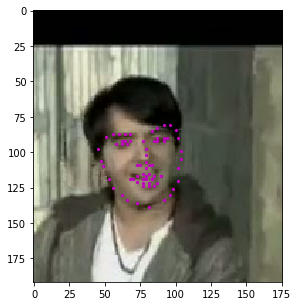

In [6]:
# Display a few different types of images by changing the index n
# select an image by index in our data frame
n = 0
image_name = key_pts_frame.iloc[n, 0]
key_pts = key_pts_frame.iloc[n, 1:].as_matrix()
key_pts = key_pts.astype('float').reshape(-1, 2)
# plot image with features on the same figure
plt.figure(figsize=(5, 5))
show_keypoints(mpimg.imread(os.path.join('/data/training/', image_name)), key_pts)
plt.show()

## Dataset class and Transformations

In [7]:
#load batches of image and keypoints data, and apply transformation  to our data
# eg.(rescaling, and normalising images for training a neural network)
from torch.utils.data import Dataset, DataLoader

class FacialKeypointsDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.key_pts_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.key_pts_frame)
    # support the indexing so that dataset[i] can be used to get i position of image or keypoints data
    def __getitem__(self, idx):
        image_name = os.path.join(self.root_dir,
                                self.key_pts_frame.iloc[idx, 0])
        
        image = mpimg.imread(image_name)
        
        # if image has an alpha color channel, get rid of it
        if(image.shape[2] == 4):
            image = image[:,:,0:3]
        
        key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
        key_pts = key_pts.astype('float').reshape(-1, 2)
        sample = {'image': image, 'keypoints': key_pts}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [8]:
# instantiate the dataset and display image
# Construct the dataset
face_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                      root_dir='/data/training/')

# print some stats about the dataset
print('Length of dataset: ', len(face_dataset))

Length of dataset:  3462


0 (295, 237, 3) (68, 2)
1 (185, 160, 3) (68, 2)
2 (218, 250, 3) (68, 2)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


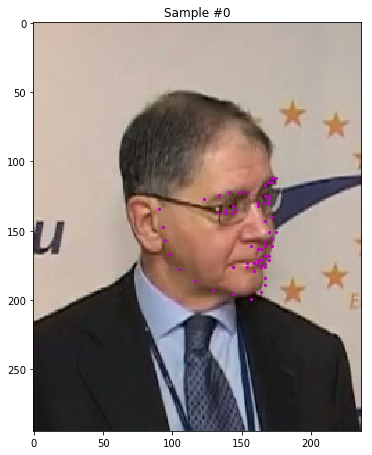

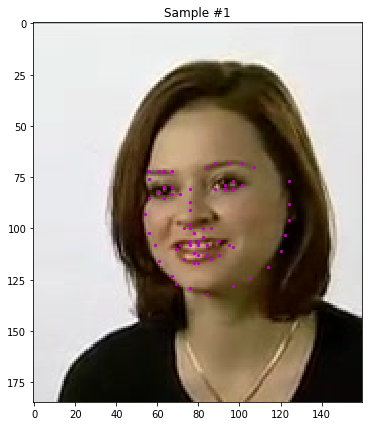

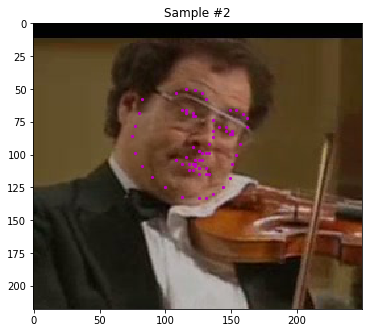

In [9]:
# Display a few of the images from the dataset
num_to_display = 3

for i in range(num_to_display):
    
    # define the size of images
    fig = plt.figure(figsize=(20,10))
    
    # randomly select a sample
    rand_i = np.random.randint(0, len(face_dataset))
    sample = face_dataset[rand_i]

    # print the shape of the image and keypoints
    print(i, sample['image'].shape, sample['keypoints'].shape)

    ax = plt.subplot(1, num_to_display, i + 1)
    ax.set_title('Sample #{}'.format(i))
    
    # Using the same display function, defined earlier
    show_keypoints(sample['image'], sample['keypoints'])

## Transforms

In [10]:
import torch
from torchvision import transforms, utils
# tranforms

# normalise : convert a colour image to grayscale values with range of [0, 1] and normalise the keypoints to be in raange
# of [-1, 1]
class Normalize(object):
    """Convert a color image to grayscale and normalize the color range to [0,1]."""        

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
        
        image_copy = np.copy(image)
        key_pts_copy = np.copy(key_pts)

        # convert image to grayscale
        image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # scale color range from [0, 255] to [0, 1]
        image_copy=  image_copy/255.0
        
        # scale keypoints to be centered around 0 with a range of [-1, 1]
        # mean = 100, sqrt = 50, so, pts should be (pts - 100)/50
        key_pts_copy = (key_pts_copy - 100)/50.0


        return {'image': image_copy, 'keypoints': key_pts_copy}

# rescale image to a given size
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = cv2.resize(image, (new_w, new_h))
        
        # scale the pts, too
        key_pts = key_pts * [new_w / w, new_h / h]

        return {'image': img, 'keypoints': key_pts}

# crop image randomly
class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        key_pts = key_pts - [left, top]

        return {'image': image, 'keypoints': key_pts}

# convert numpy images to tensor images
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, key_pts = sample['image'], sample['keypoints']
         
        # if image has no grayscale color channel, add one
        if(len(image.shape) == 2):
            # add that third color dim
            image = image.reshape(image.shape[0], image.shape[1], 1)
            
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        
        return {'image': torch.from_numpy(image),
                'keypoints': torch.from_numpy(key_pts)}

## Test out the transforms

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


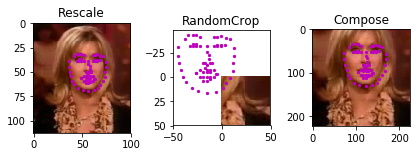

In [11]:
# test out some of these transforms
rescale = Rescale(100)
crop = RandomCrop(50)
composed = transforms.Compose([Rescale(250),
                               RandomCrop(224)])

# apply the transforms to a sample image
test_num = 500
sample = face_dataset[test_num]

fig = plt.figure()
for i, tx in enumerate([rescale, crop, composed]):
    transformed_sample = tx(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tx).__name__)
    show_keypoints(transformed_sample['image'], transformed_sample['keypoints'])

plt.show()

## Create the transformed dataset

Apply the transforms in order to get grayscale images of the same shape. Verify that your transform works by printing out the shape of the resulting data (printing out a few examples should show you a consistent tensor size).

In [12]:
# define the data tranform
#rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


In [13]:
# print transformed data
print('Number of images: ', len(transformed_dataset))

# tensors are the expected size
for i in range(5):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())


Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])
4 torch.Size([1, 224, 224]) torch.Size([68, 2])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
